<h1>Prediction of glycol flow in  photovoltaic-thermal hybrid solar collectors</h1>

**Name:** Marcus Skinner <br>
**Instructor:** Dr. Moh'd

<h2>Problem Statement</h2>

Photovoltaic-thermal (PV/T) hybrid solar collectors convert solar radiation to usable energy. Unlike standard solar collectors, PV/T utilizes fluid to cool down the solar panel and attain a higher overall effeciency. We will try to learn the optimal glycol flow based on energy usable data of a home to maintain the ideal temperature for a PV/T solar collector.

<h2>Architecture</h2>
Here's the schematic for the solar collector:

![PV T Schematic](imgs/schematic.PNG)

We will use a pump to regulate the glycol flow based on usage data of a household. Here is a schematic of the pump:

![Pump Schematic](imgs/layout.PNG)

<h2>Data Cleaning</h2>
Here, I broke the 'reading.csv' file into files for each house. 

**Do not run this unless you want a bunch of new files on your computer**

In [ ]:
import pandas as pd
import os

df_chunked = pd.read_csv("reading.csv", chunksize=30000)

for chunk in df_chunked:
    uniques = chunk.iloc[:,1].unique().tolist()
    for val in uniques:
        df_to_write = chunk[chunk.iloc[:,1] == val]
        if os.path.isfile(str(val)+'.csv'):
            df_to_write.to_csv(str(val)+'.csv', mode='a', index=False, header=False)
        else:
            df_to_write.to_csv(str(val)+'.csv', index=False)

Next, I removed any irrelevant features, along with rows and columns with missing values.

In [9]:
import numpy as np
import pandas as pd

headers = ["id", "WEL", "SAMPLE_TIME", "AUX_HEAT_ON", "FLOW_GLY", "FLOW_WATER", "FLOW_WATER_D", "HEAT_AUX_D", "PV_VOLTS", "PV_AMPS", "SOLAR_POWER", "T_COLLECTOR", 
           "T_STORAGE", "T_HX_GLY_IN", "T_HX_GLY_OUT", "T_HX_WATER_OUT", "T_WATER_COLD", "T_WATER_SOLAR", "T_WATER_HOT", "LED_PUMP_ON", "LED_T_COLL_HI", 
           "LED_T_STOR_HI", "LED_DELT_LO", "updatedAt", "createdAt", "date", "time"]

df = pd.read_csv("data/WEL0755.csv", names=headers)

# Remove irrelevant features
df = df.drop(columns=['id','WEL', 'date', 'time', 'updatedAt', 'createdAt'])
df = df.replace([r'\N', r'\N.1', r'\N.2', r'\N.3'], np.nan)

# Remove features with many missing values
df = df.drop(columns = ['LED_T_STOR_HI', 'LED_DELT_LO'])
df = df.dropna(how="any", axis=0)

# Change SAMPLE_TIME to a numerical value
df['SAMPLE_TIME'] = pd.to_datetime(df['SAMPLE_TIME'], format="%Y-%m-%d %H:%M:%S")

# change all columns to numerical values
for col in df:
    df[col] = pd.to_numeric(df[col])
    
df['SAMPLE_TIME'] = df['SAMPLE_TIME'] / 10**9

df.head(25)

C:\Users\marcs\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SAMPLE_TIME,AUX_HEAT_ON,FLOW_GLY,FLOW_WATER,FLOW_WATER_D,HEAT_AUX_D,PV_VOLTS,PV_AMPS,SOLAR_POWER,T_COLLECTOR,T_STORAGE,T_HX_GLY_IN,T_HX_GLY_OUT,T_HX_WATER_OUT,T_WATER_COLD,T_WATER_SOLAR,T_WATER_HOT,LED_PUMP_ON,LED_T_COLL_HI
87825,1.398902e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.43,25.82,34.38,29.62,40.81,20.82,41.88,52.30,0,0
87826,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.44,25.81,34.37,29.56,40.81,20.81,41.85,52.55,0,0
87827,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.49,25.76,34.36,29.58,40.81,20.76,41.72,52.40,0,0
87830,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.56,25.70,34.32,29.56,40.82,20.69,41.84,52.44,0,0
87835,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.59,25.81,34.31,29.56,40.81,20.81,42.14,52.25,0,0
87837,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.66,25.70,34.31,29.54,40.80,20.70,42.13,52.25,0,0
87839,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.69,25.72,34.31,29.50,40.75,20.73,41.63,52.07,0,0
87840,1.398903e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.75,25.76,34.31,29.53,40.75,20.76,41.56,52.26,0,0
87843,1.398904e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.87,25.83,34.29,29.52,40.75,20.82,42.13,52.14,0,0
87844,1.398904e+09,0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,3.93,25.80,34.29,29.50,40.75,20.81,41.92,52.13,0,0


Each feature is described as follows:

- **Date**: date
- **Time**: time of day
- **AUX_HEAT_ON**: Signal from toroid indicating whether auxiliary heater is turned on ('1'), or off ('0')
- **FLOW_GLY**: Flow of glycol in solar loop
- **FLOW_WATER**: Flow of domestic hot water from main water supply
- **FLOW_WATER_D**: Total domestic hot water drawn that day. Daily accumulation begins 12:01 am.
- **HEAT_AUX_D**: Total energy used by the auxiliary water heater that day. Daily accumulation begins 12:01 am.
- **LED_PUMP_ON**: Status of eMag Solar Pump: Green LED - Pump ON'
- **LED_T_COLL_HI**: Status of eMag Solar Pump: Orange LED - 'Collector Temperature HI' ( > 110ºC)
- **LED_T_STOR_HI**: Status of eMag Solar Pump: Yellow LED - 'Storage Temperature HI' (> 65ºC)
- **LED_DELT_LO**: Status of eMag Solar Pump: Red LED - 'Low delta-T' (aka. 'Pump OFF' or 'collector temperature < storage temperature')
- **PV_AMPS**: Current of photovoltaic module.
- **PV_VOLTS**: Voltage of photovoltaic module.
- **SOLAR_POWER**: Solar flux
- **T_COLLECTOR**: Temperature of the solar collector (as measured by the solar collector thermistor, or using 'T_AIR_OUTSIDE' + 5 when V_PV is less than 13 V).
- **T_STORAGE**: Temperature of the water near the bottom of the solar tank (as measured by the thermistor on the heat exchanger,  or using 'T_WATER_COLD' + 5 when V_PV is less than 13 V).).
- **T_HX_GLY_IN**: Temperature of the glycol entering the heat exchanger.
- **T_HX_GLY_OUT**: Temperature of the glycol exiting the heat exchanger.
- **T_HX_WATER_OUT**: Temperature of the water exiting the heat exchanger, going into the solar tank.
- **T_WATER_COLD**: Temperature of the water entering the solar tank.
- **T_WATER_HOT**: Temperature of the water exiting the auxiliary heater.
- **T_WATER_SOLAR**: Temperature of the water exiting the solar tank, going into the auxiliary heater.

<h2>Find the Relevance of each feature in the dataset using Pearson correlation</h2>

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [10]:
y = df['FLOW_GLY']
X = df.drop(columns=['FLOW_GLY'])

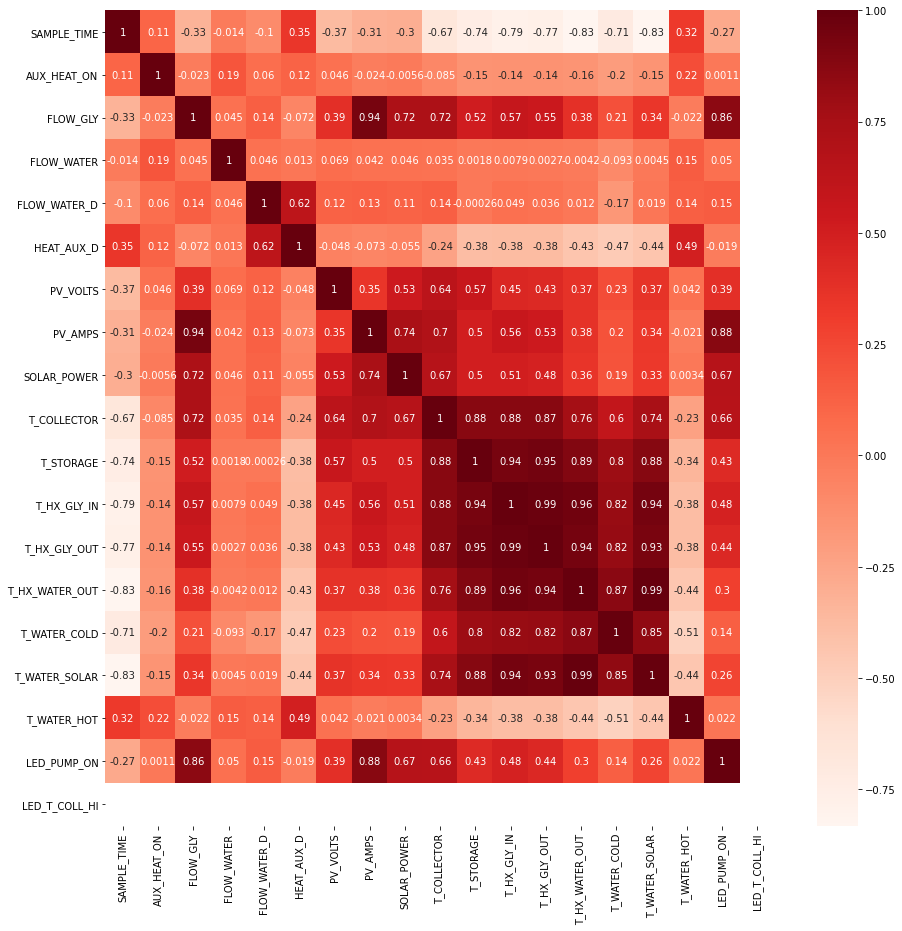

In [55]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
#Correlation with output variable
cor_target = abs(cor["FLOW_GLY"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

FLOW_GLY        1.000000
PV_AMPS         0.936596
SOLAR_POWER     0.715351
T_COLLECTOR     0.718473
T_STORAGE       0.516276
T_HX_GLY_IN     0.574876
T_HX_GLY_OUT    0.548212
LED_PUMP_ON     0.859381
Name: FLOW_GLY, dtype: float64

In [59]:
print(df[['PV_AMPS', 'SOLAR_POWER', 'T_COLLECTOR', 'T_STORAGE', 'T_HX_GLY_IN', 'T_HX_GLY_OUT', 'LED_PUMP_ON']].corr())

               PV_AMPS  SOLAR_POWER  T_COLLECTOR  T_STORAGE  T_HX_GLY_IN  \
PV_AMPS       1.000000     0.735559     0.697369   0.501458     0.564128   
SOLAR_POWER   0.735559     1.000000     0.666798   0.504726     0.506186   
T_COLLECTOR   0.697369     0.666798     1.000000   0.876457     0.875816   
T_STORAGE     0.501458     0.504726     0.876457   1.000000     0.937488   
T_HX_GLY_IN   0.564128     0.506186     0.875816   0.937488     1.000000   
T_HX_GLY_OUT  0.534306     0.481651     0.871634   0.950334     0.985396   
LED_PUMP_ON   0.876290     0.668862     0.662159   0.426073     0.484272   

              T_HX_GLY_OUT  LED_PUMP_ON  
PV_AMPS           0.534306     0.876290  
SOLAR_POWER       0.481651     0.668862  
T_COLLECTOR       0.871634     0.662159  
T_STORAGE         0.950334     0.426073  
T_HX_GLY_IN       0.985396     0.484272  
T_HX_GLY_OUT      1.000000     0.439540  
LED_PUMP_ON       0.439540     1.000000  


Pearson correlation uses linear regression. We assume that all features in linear regression are independent, so if two features have a high correlation with each other, we need not use both. For this, I will assume any correlation above 0.8 implies highly correlated features. PV_AMPS is highly correlated with LED_PUMP_ON. T_COLLECTOR is highly correlated with T_HX_GLY_IN, T_HX_GLY_OUT, and T_STORAGE. So, we can learn the FLOW_GLY from the three features, PV_AMPS, SOLAR_POWER, and T_COLLECTOR.

<h2>Predict the glycol flow using a KNN Regressor</h2>

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
X = df[['PV_AMPS', 'SOLAR_POWER', 'T_COLLECTOR']]
y = df['FLOW_GLY']

In [72]:
clf = KNeighborsRegressor(n_neighbors=1)
clf.fit(X, y)

KNeighborsRegressor(n_neighbors=1)

In [74]:
clf.score(X, y)

0.9999636543833965

With using the training data as test data, we get almost perfect accuracy. Of course, this will not happen in real life, so we will use a validation data set to evaluate the regressor performances.

<h2>Predict the glycol flow using the KNN Regressor and Cross Validation</h2>

In [6]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [26]:
clf1 = KNeighborsRegressor(n_neighbors=7)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.8202399632598768

<h2>Predict the glycol flow using SVM</h2>

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
import numpy as np

In [17]:
clf2 = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
clf2.fit(X_train, y_train)

C:\Users\marcs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=0, tol=1e-05))])

In [18]:
clf2.score(X_test, y_test)

0.8772006535411038

<h2>Predict glycol flow using Decision Tree Regression</h2>

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
clf3 = DecisionTreeRegressor(max_depth=5)
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.9067960916013365

<h2>Predict glycol flow using a Neural Network</h2>

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
clf4 = MLPRegressor(random_state=1, max_iter=500, activation='tanh', learning_rate_init=0.0001, hidden_layer_sizes=200)
clf4.fit(X_train, y_train)
clf4.score(X_test, y_test)

0.9024024991856336

In [22]:
prediction = clf4.predict(X_test)
actual = y_test

comparison = pd.DataFrame(list(zip(prediction, actual)), columns=['Prediction', 'Actual'])
comparison.head(60)

,Prediction,Actual
0,-0.042446,0.00
1,0.124829,0.00
2,0.648988,0.00
3,0.022181,0.00
4,0.103132,0.00
5,2.122849,0.94
6,-0.025365,0.00
7,-0.059263,0.00
8,-0.001122,0.00
9,-0.000055,0.00


Most of these values are pretty close to the actual values. But several are very far off. Below is a graph that shows the difference between the actual and predicted values. Remeber that glycol flow takes on a value between 0 and 4.

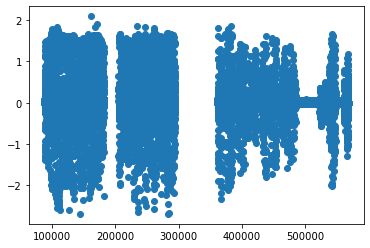

In [25]:
g=plt.plot(actual - prediction,marker='o',linestyle='')

<h2>Predict glycol flow using ensamble learning stacking regression</h2>

In [29]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
eclf = StackingRegressor(estimators=[('knn', clf1), ('svm', clf2), ('dt', clf3), ('mlp', clf4)], final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
eclf.fit(X_train, y_train)
eclf.score(X_test, y_test)

C:\Users\marcs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\marcs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\marcs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\marcs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\marcs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

0.8952970309544085

<h2>Results</h2>

A summary of the regressor performances can be seen below. The neural network and Decision Tree Regression had an $R^2$ value of 0.9. This means that it can predict the value of the glycol flow within about 1/3 a standard deviation from the actual value.

|Regressor|$R^2$ Score|
|:-|:-|
|KNN|0.820|
|SVM|0.877|
|Decision Tree|0.907|
|Neural Network|0.902|
|Ensamble|0.895

We should also note that the three features, PV_AMPS, SOLAR_POWER, and T_COLLECTOR have the most influence on the FLOW_GLY.